# DA:623 Assignment: Train and demonstrate the decision boundaries for logistic regression, for binary classification

## Objectives
In this lab, our objectives are as follows:

1. Loading and preprocessing the Diabetes dataset.
2. Training a logistic regression model to establish the decision boundary.
3. Evaluating the performance of the decision boundary on a separate test dataset.

# **Logistic Regression**
The fundamental application of logistic regression is to determine a decision boundary for a binary classification problem. Although the baseline is to identify a binary decision boundary, the approach can be very well applied for scenarios with multiple classification classes or multi-class classification.


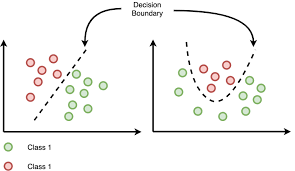

In the above diagram, the dashed line can be identified as the decision boundary since we will observe instances of a different class on each side of the boundary. Our intention in logistic regression would be to decide on a proper fit to the decision boundary so that we will be able to predict which class a new feature set might correspond to. The interesting fact about logistic regression is the utilization of the sigmoid function as the target class estimator.

#The Sigmoid Function



* For logistic regression, the model is represented as

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$

  
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0$, predict $y=0$

# Implementation of Logistic Regression in Python

**Import necessary libraries**

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


The following code loads the diabetes dataset using the load_diabetes function from scikit-learn, passing in feature data X and target values y. Then, it converts the binary representation of the continuous target variable y.

 A patient’s diabetes measure is classified as 1 (indicating diabetes) if it is higher than the median value, and as 0 (showing no diabetes).

For simplicity , we have taken only two features from the dataset.

*   3rd feature - BMI
*   9th feature - s5



In [4]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data[:,[2,8]], diabetes.target


# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)


**Splitting The Dataset**:

Train and Test dataset
Splitting the dataset to train and test. 80% of data is used for training the model and 20% of it is used to test the performance of our model.  

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y_binary, test_size=0.2, random_state=42)


**Feature Scaling**

In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The StandardScaler instance is created; this will be used to standardize the features. It uses the scaler’s fit_transform method to normalize the training data (X_train) and determine its mean and standard deviation. Then, it standardizes the testing data (X_test) using the calculated mean and standard deviation from the training set. Model training and evaluation are made easier by standardization, which guarantees that the features have a mean of 0 and a standard deviation of 1.

**Train The Model**

It establishes a logistic regression model instance.Then, it employs the fit approach to train the model using the binary target values (y_train) and standardized training data (X_train). Following execution, the model object may now be used to forecast new data using the patterns it has learnt from the training set.

In [7]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

**Accuracy**

Metrics are used to check the model performance on predicted values and actual values.

In [8]:
# Evaluate the model
y_pred = model.predict(X_test)

accuracy1 = model.score(X_train, y_train)
accuracy = model.score(X_test, y_test)

print("Training Accuracy: {:.2f}%".format(accuracy1 * 100))
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


Training Accuracy: 74.22%
Test Accuracy: 76.40%


**Confusion Matrix and Classification Report**

In [9]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[38 11]
 [10 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        49
           1       0.73      0.75      0.74        40

    accuracy                           0.76        89
   macro avg       0.76      0.76      0.76        89
weighted avg       0.76      0.76      0.76        89



## Plotting decision boundary

Now, let's understand how the logistic regression model is making predictions.

Now we should have a better decision of what the hypothesis function is computing by drawing the decision boundary:

With  $h_\theta=g(\theta_0+\theta_1X_1+\theta_2X_2)$ and $g(z)=\frac{1}{1+e^{-z}}$,

we predict $y=1$ if the sigmoild function $\geq0.5$, so the boundary would be $\theta_0+\theta_1X_1+\theta_2X_2=0$

Lets , have a look at these parameters



In [10]:
#intercept
b = model.intercept_[0]
print (b)

#coefficients
print (model.coef_)

0.1116120736631844
[[0.90625575 0.77301008]]



<br>Here, $\theta_0=0.11,\theta_1=0.9,\theta_2=0.77$,


Therfore, our logistic regression model will be,

  $f(\mathbf{x}) = g(0.11 + 0.9x_0 + 0.77x_1)$


- Therefore the model predicts $y=1$ if $0.11 + 0.9x_0 + 0.77x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $0.77 + 0.9x_0 + 1.1x_1 = 0$, which is equivalent to $0.77x_1 = - (0.11 + 0.9x_0$).

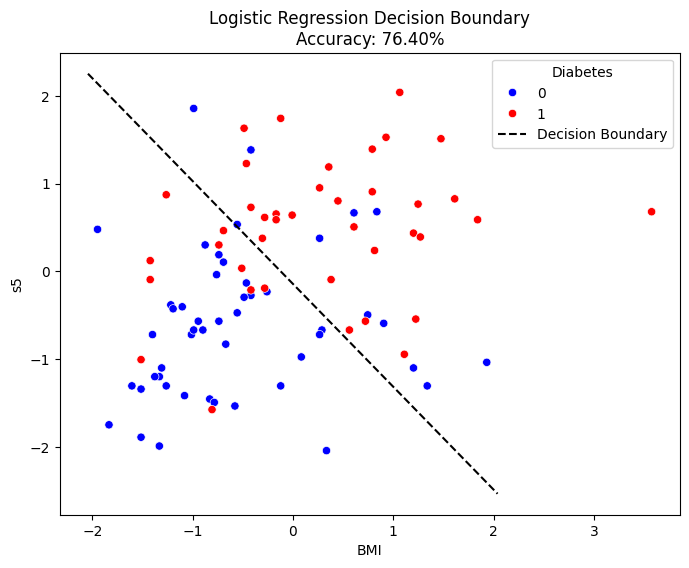

In [11]:
# prompt: make scatter plot of 1st column of values of matrix X vs 2nd column of values of matrix X

# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))

# plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')

#Plot decision boundary line
x_values = np.array([np.min(X_test[:, 1]), np.max(X_test[:, 1])])
y_values = -(0.1116120736631844 + 0.90625575 * x_values) / 0.77301008
plt.plot(x_values, y_values, color='k', linestyle='--', label='Decision Boundary')

plt.xlabel("BMI")
plt.ylabel("s5")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()



The above plot shows the decision boundary separating diabetic samples vs non-diabetic samples.


*   Diabetic - 1 value shows diabetic people
*   Diabetic - 0 value shows non-diabetic people




# Conclusion
In this assignment, we utilized logistic regression from scratch to conduct binary classification on the Diabetes dataset. Our goal was to differentiate between non-diabetic and diabetic individuals based on their "s5" feature and BMI. The plotted decision boundary illustrates the division between the two classes, showcasing the model's ability to classify data points accurately using the learned parameters.